Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](http://archive.is/Nu3EI), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/category_encoders/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/category_encoders/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](https://contrib.scikit-learn.org/category_encoders/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](https://contrib.scikit-learn.org/category_encoders/catboost.html)
- [Generalized Linear Mixed Model Encoder](https://contrib.scikit-learn.org/category_encoders/glmm.html)
- [James-Stein Encoder](https://contrib.scikit-learn.org/category_encoders/jamesstein.html)
- [Leave One Out](https://contrib.scikit-learn.org/category_encoders/leaveoneout.html)
- [M-estimate](https://contrib.scikit-learn.org/category_encoders/mestimate.html)
- [Target Encoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)
- [Weight of Evidence](https://contrib.scikit-learn.org/category_encoders/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/colinmorris/embedding-layers)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation — maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
# Other Imports
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

Train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

Train.shape, test.shape

((59400, 41), (14358, 40))

## Split train into train and validation sets:


In [4]:
train, val = train_test_split(Train, train_size=0.80, test_size=0.20, 
                              stratify=Train['status_group'], random_state=32)

print('Train shape:',Train.shape)
print('Train and validation:',train.shape[0]+val.shape[0])

Train shape: (59400, 41)
Train and validation: 59400


In [5]:
train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
47300,23331,0.0,2013-03-15,Tcrs,1388,DWE,36.699855,-2.637790,Ofisini,0,Internal,Loloiboni,Arusha,2,6,Longido,Namanga,100,True,GeoData Consultants Ltd,VWC,Kimokouwa water project,True,1999,gravity,gravity,gravity,vwc,user-group,pay when scheme fails,on failure,soft,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional
41350,63609,20.0,2011-03-05,Tanapa,363,Local te,37.691527,-6.047001,Kwa Makusanya,0,Wami / Ruvu,Kibwende,Morogoro,5,6,Mvomero,Kanga,1,True,GeoData Consultants Ltd,VWC,NaN,True,2011,swn 80,swn 80,handpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
18162,35317,0.0,2011-04-01,NaN,0,NaN,33.795402,-9.357812,Ikapu,0,Lake Nyasa,Ikapu,Mbeya,12,4,Rungwe,Kambasegese,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional
3180,36052,0.0,2013-03-04,World Vision/adra,1346,Community,36.843293,-3.334549,Rehema,0,Pangani,Nkoakirua,Arusha,2,7,Meru,Nkoaranga,96,True,GeoData Consultants Ltd,VWC,Kyamara gravity water supply,True,1999,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
55391,3744,0.0,2012-10-29,Village Council,0,Village Council,31.884979,-5.111924,Usukumani,0,Lake Tanganyika,Tujilinde,Tabora,14,4,Urambo,Vumilia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,afridev,afridev,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29571,59519,0.0,2011-03-28,Government Of Tanzania,1222,DWE,38.336675,-4.887317,Kwa Mzee Mweta,65,Pangani,Shangalawei,Tanga,4,1,Lushoto,Vuga,1,True,GeoData Consultants Ltd,VWC,Kindoi streem,True,1972,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1529,27028,0.0,2011-03-23,Government Of Tanzania,414,RWE,38.210056,-4.804782,Kwaboniface,0,Pangani,Kiwanjani,Tanga,4,2,Korogwe,Mazinde,350,True,GeoData Consultants Ltd,VWC,Mazinde water supply,False,1970,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
58571,72922,0.0,2012-10-23,Hesawa,1613,Hesawa,34.711888,-1.691930,Secondary,0,Lake Victoria,Kerenero,Mara,20,2,Serengeti,Machochwe,1,False,GeoData Consultants Ltd,Other,NaN,NaN,1999,other - rope pump,rope pump,rope pump,other,other,never pay,never pay,soft,good,dry,dry,rainwater harvesting,rainwater harvesting,surface,hand pump,hand pump,non functional
1443,36453,0.0,2012-10-24,Halmashauri Ya Wilaya Sikonge,0,Halmashauri ya wilaya sikonge,33.008591,-5.894536,Kwa Anthon Kadokado,0,Lake Tanganyika,Bondeni,Tabora,14,5,Sikonge,Kiloleli,0,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa Kiloleli,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,dry,dry,dam,dam,surface,communal standpipe,communal standpipe,non functional


## **Define a function:**
----------
It should wrangle train, validate, and test sets in the same way. 


In [6]:
def wrangler(X): 
  # prevent overwriting original
  X = X.copy()
  
  # replace outlier with zero
  X['latitude'] = X['latitude'].replace(-2e-08, 0)

  # drop duplicates and futiles
  duplicates = ['extraction_type','extraction_type_group','payment',
                'source_type', 'quality_group', 'quantity_group',
                'waterpoint_type_group','management']
  nugatory   = ['recorded_by','scheme_name']

  X = X.drop(columns= duplicates)
  X = X.drop(columns= nugatory)

  # Creating nans to be imputed later
  cols_with_zeros = ['longitude', 'latitude', 'population',
                      'gps_height', 'construction_year']
  for col in cols_with_zeros:
    X[col] = X[col].replace(0, np.nan)  
  
  # Reduce cardinality of 'funder' feature 
  Top20funder = X['funder'].value_counts(normalize=True)[:20]
  X.loc[~X['funder'].isin(Top20funder), 'funder'] = 'Other'

  # And 'installer' feature
  Top20install = X['installer'].value_counts(normalize=True)[:20]
  X.loc[~X['installer'].isin(Top20install),'installer'] = 'Other'

  # Changing region and district code features to categorical features
  X['region_code'] = X['region_code'].astype(str)
  X['district_code'] = X['district_code'].astype(str)

  # Changing date recorded to datetime
  X['date_recorded'] = pd.to_datetime(X['date_recorded'], 
                                      infer_datetime_format=True)
  
  # Extracting year data from date recorded and dropping superfluous feature
  X['year_recorded'] = X['date_recorded'].dt.year
  X = X.drop(columns='date_recorded')

  # Engineering Age and Age_missing feature
  X['age'] = X['year_recorded'] - X['construction_year']
  X['age_MISSING'] = X['age'].isnull()

  return X

### Clean outliers and engineer features

In [7]:
# Wrangle Dataframes
train = wrangler(train)
val   = wrangler(val)
test  = wrangler(test)

# Confirm changes
train

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group,year_recorded,age,age_MISSING
47300,23331,0.0,Other,1388.0,Other,36.699855,-2.637790,Ofisini,0,Internal,Loloiboni,Arusha,2,6,Longido,Namanga,100.0,True,VWC,True,1999.0,gravity,user-group,on failure,soft,dry,river,surface,communal standpipe,non functional,2013,14.0,False
41350,63609,20.0,Other,363.0,Other,37.691527,-6.047001,Kwa Makusanya,0,Wami / Ruvu,Kibwende,Morogoro,5,6,Mvomero,Kanga,1.0,True,VWC,True,2011.0,handpump,user-group,per bucket,soft,enough,shallow well,groundwater,hand pump,functional,2011,0.0,False
18162,35317,0.0,Other,NaN,Other,33.795402,-9.357812,Ikapu,0,Lake Nyasa,Ikapu,Mbeya,12,4,Rungwe,Kambasegese,NaN,True,VWC,NaN,NaN,gravity,user-group,unknown,soft,enough,river,surface,communal standpipe,non functional,2011,NaN,True
3180,36052,0.0,Other,1346.0,Other,36.843293,-3.334549,Rehema,0,Pangani,Nkoakirua,Arusha,2,7,Meru,Nkoaranga,96.0,True,VWC,True,1999.0,gravity,user-group,unknown,soft,insufficient,spring,groundwater,communal standpipe,non functional,2013,14.0,False
55391,3744,0.0,Other,NaN,Other,31.884979,-5.111924,Usukumani,0,Lake Tanganyika,Tujilinde,Tabora,14,4,Urambo,Vumilia,NaN,True,VWC,True,NaN,handpump,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump,functional needs repair,2012,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29571,59519,0.0,Other,1222.0,Other,38.336675,-4.887317,Kwa Mzee Mweta,65,Pangani,Shangalawei,Tanga,4,1,Lushoto,Vuga,1.0,True,VWC,True,1972.0,gravity,user-group,never pay,soft,enough,spring,groundwater,communal standpipe,functional,2011,39.0,False
1529,27028,0.0,Other,414.0,Other,38.210056,-4.804782,Kwaboniface,0,Pangani,Kiwanjani,Tanga,4,2,Korogwe,Mazinde,350.0,True,VWC,False,1970.0,gravity,user-group,never pay,soft,enough,river,surface,communal standpipe,functional,2011,41.0,False
58571,72922,0.0,Other,1613.0,Other,34.711888,-1.691930,Secondary,0,Lake Victoria,Kerenero,Mara,20,2,Serengeti,Machochwe,1.0,False,Other,NaN,1999.0,rope pump,other,never pay,soft,dry,rainwater harvesting,surface,hand pump,non functional,2012,13.0,False
1443,36453,0.0,Other,NaN,Other,33.008591,-5.894536,Kwa Anthon Kadokado,0,Lake Tanganyika,Bondeni,Tabora,14,5,Sikonge,Kiloleli,NaN,True,VWC,True,NaN,other,user-group,never pay,soft,dry,dam,surface,communal standpipe,non functional,2012,NaN,True


## Select Features:

In [8]:
# Target is status_group
target = 'status_group'

# Drop columns intuitively deemed unnecessary
super = [target,'id','wpt_name','num_private','region_code','lga',
         'ward','public_meeting','payment_type']

# Remaining dataframe
train_features = train.drop(columns=super)

# Get a list of the numeric features
numeric = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 100
categorical = cardinality[cardinality <= 100].index.tolist()

# Combine those lists 
features = numeric + categorical

In [9]:
# Arrange feature matrices and target vectors
x_train  = train[features]
x_val    = val[features]
x_test   = test[features]

y_train  = train[target]
y_val    = val[target]

## **Ordinal Encoding and Random Forest Classifier:**

In [10]:
# Create pipeline for ordinal encoding, imputing, and classifier
pipeline = make_pipeline(ce.OrdinalEncoder(),
                         IterativeImputer(sample_posterior=True, 
                                          initial_strategy='most_frequent', 
                                          random_state=32,add_indicator=True),
                         RandomForestClassifier(n_estimators=250, n_jobs=-1, 
                                                random_state=32))
pipeline.fit(x_train,y_train)
print(f'Validation Accuracy: {pipeline.score(x_val, y_val):.3f}')

Validation Accuracy: 0.800


In [11]:
pipeline2 = make_pipeline(ce.OrdinalEncoder(),
                         IterativeImputer(max_iter=10,
                                          initial_strategy='mean',
                                          imputation_order='random', 
                                          random_state=24),
                         RandomForestClassifier(n_estimators= 300,
                                                min_samples_leaf= 2,
                                                min_samples_split= 3, 
                                                n_jobs=-1, 
                                                random_state=24))
pipeline2.fit(x_train,y_train)
print(f'Validation Accuracy: {pipeline2.score(x_val, y_val):.3f}')

Validation Accuracy: 0.808


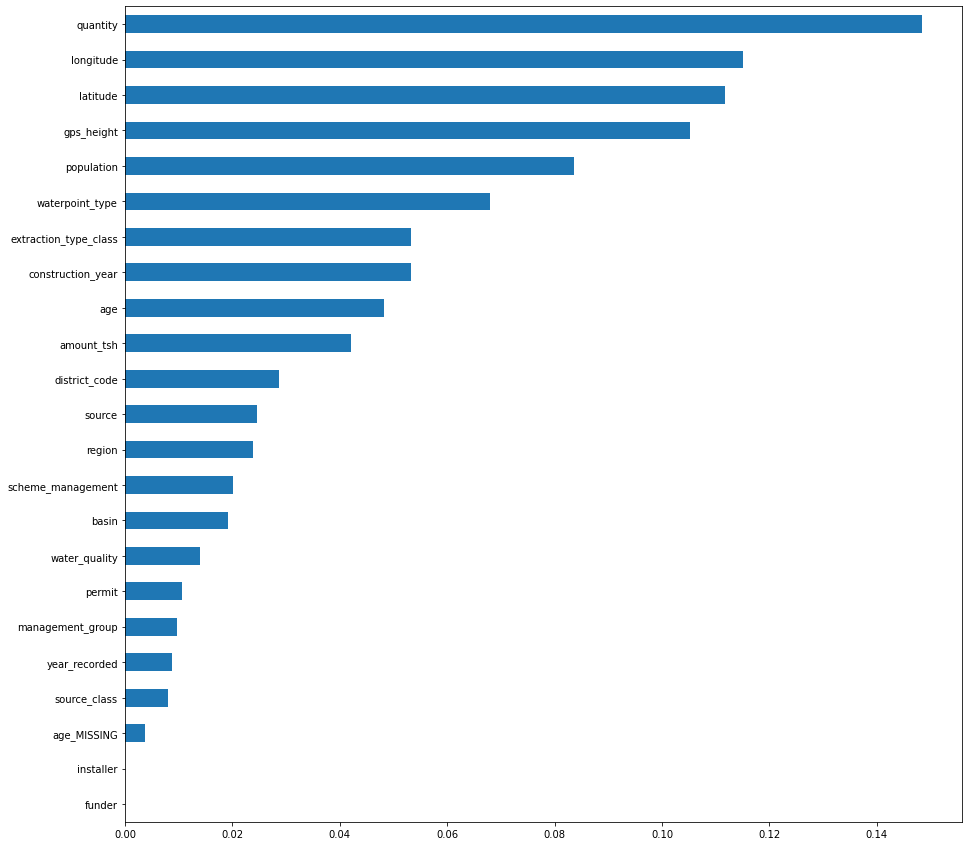

In [12]:
model = pipeline2.named_steps['randomforestclassifier']
encoder = pipeline2.named_steps['ordinalencoder']
encoded_columns = encoder.transform(x_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(15,15))
importances.sort_values().plot.barh();

## Predict and Submit: 

In [13]:
# Predict on test data
Y_pred = pipeline2.predict(x_test)

In [14]:
# Submit to Kaggle
submission = test[['id']].copy()
submission['status_group'] = Y_pred
submission.to_csv('Meghan_Felker_TWPP2.csv', index=False)